<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/ToxicComments2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import pandas as pd
import numpy as np
import re
import nltk 

import matplotlib.pyplot as plt
#98.08%

In [2]:
#toxic_comments = pd.read_csv("/content/train.csv",engine='python',encoding='utf-8')
toxic_comments = pd.read_csv("/content/drive/MyDrive/toxicCommentz/train.csv")


In [3]:
print(toxic_comments['comment_text'].head())
print(toxic_comments.shape)
#to clear out all links from our text
toxic_comments['comment_text'] = toxic_comments['comment_text'].str.replace('(http|https):\/\/www.[A-Za-z0-9.\/?]+\s', '', case=False)
print(toxic_comments['comment_text'][123])


0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object
(159571, 8)
Should say something about his views as an educationalist and socialist political commentator.

Link to mentions this a bit - he stood as an election candidate for Respect.


In [4]:
print(len(toxic_comments['comment_text']))
toxic_comments.dropna(subset=['comment_text'], inplace=True)
print(len(toxic_comments['comment_text']))
toxic_comments.head(30)


159571
159571


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
print(len(toxic_comments['comment_text']))
toxic_comments.dropna(subset=['comment_text'], inplace=True)
print(len(toxic_comments['comment_text']))
toxic_comments.head(30)

159571
159571


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
counter = 0
offensive = []
nonOffensive = []
for i in range(len(toxic_comments)):
  #if (i <= 500):
  if (int(toxic_comments["toxic"][i]) == 1 or int(toxic_comments["severe_toxic"][i]) == 1 or 
      int(toxic_comments["obscene"][i]) == 1 or int(toxic_comments["threat"][i]) == 1 or
      int(toxic_comments["insult"][i]) == 1 or int(toxic_comments["identity_hate"][i]) == 1):
    offensive.append(1)
    nonOffensive.append(0)
  else: 
    nonOffensive.append(1)
    offensive.append(0)

toxic_comments['offensive'] = offensive
toxic_comments['nonOffensive'] = nonOffensive




In [7]:
#toxic_comments_labels = toxic_comments[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
toxic_comments_labels = toxic_comments[["offensive","nonOffensive"]]


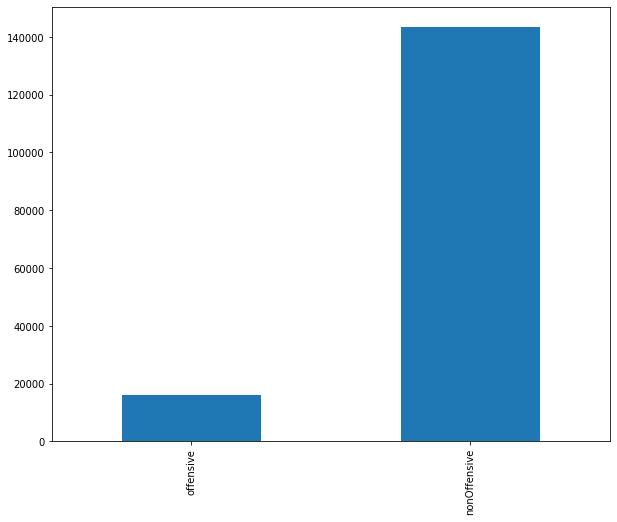

In [8]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [30]:

import spacy

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) 
import string  
def loweringText(text):
    text = text.lower()
    return text
#Removing punctuationes and those characters
def remove_punctuations(text):
  for punctuation in string.punctuation:
      text = text.replace(punctuation, ' ')
  return text
# Lowering Text from DataFrame

#Remove stopwords : words that do not put as much significance or impact as other words in the description
def remove_StopWords(text):
  text = str(text)
  line = text.split()
  text = ""
  for word in line:
    if(word not in stop_words):
      text += word
      text += " "
  return text
#Implementing lemmatization words by word
def lemmatize(text):
  line = text.split()
  txt = ""
  for word in line:
    doc = nlp(word)
    for token in doc:
      txt += token.lemma_
      txt += " "
  return txt
import re

def remove_abb(text):
  for line in text:
    text = text.replace("ü", "u")
    text = text.replace("é", "e")
    text = text.replace("á", "a")
    text = text.replace("í", "i")
    text = text.replace("ó", "o")
    text = text.replace("ú", "u")
    text = text.replace("ñ", "n")
    text = text.replace("Ñ", "n")
    text = text.replace("he's", "he is")
    text = text.replace("there's", "there is")
    text = text.replace("we're", "we are")
    text = text.replace("that's", "that is")
    text = text.replace("won't", "will not")
    text = text.replace("they're", "they are")
    text = text.replace("can't", "cannot")
    text = text.replace("wasn't", "was not")
    text = text.replace("don\x89Ûªt", "do not")
    text = text.replace("aren't", "are not")
    text = text.replace("isn't", "is not")
    text = text.replace("what's", "what is")
    text = text.replace("haven't", "have not")
    text = text.replace("hasn't", "has not")
    text = text.replace("there's", " there is")
    text = text.replace("it's", " it is")
    text = text.replace("you're", " you are")
    text = text.replace("i'm", " i am")
    text = text.replace("shouldn't", " should not ")
    text = text.replace("wouldn't", "would not ")
    text = text.replace("I\x89Ûªm", "i am")
    text = text.replace("here's", "here is")
    text = text.replace("you've", " you have")
    text = text.replace("you\x89Ûªve", "you have")
    text = text.replace("couldn't", "could not")
    text = text.replace("we've", " we have")
    text = text.replace("it\x89Ûªs", " it is")
    text = text.replace("doesn\x89Ûªt", " does not")
    text = text.replace("it\x89Ûªs", "it is")
    text = text.replace("here\x89Ûªs", " here is")
    text = text.replace(".jpeg", " ")
    text = text.replace(".jpg", " ")
    text = text.replace(".png", " ")
    text = text.replace("'s", " ")
    text = text.replace("→", " ")  
    text = text.replace("\n", " ")
    text = text.replace("\r", " ")
    text = text.replace("trácht", " ")
    text = text.replace("piece", " ")
    text = text.replace("didn't", " did not")
    text = text.replace("who's", " who is")
    text = text.replace("i\x89Ûªve", " i have")
    text = text.replace("y'all", " you all")
    text = text.replace("can\x89Ûªt", " cannot")
    text = text.replace("would've", " would have")
    text = text.replace("it'll", " it will ")
    text = text.replace("we'll", " we will ")
    text = text.replace("wouldn\x89Ûªt", " would not ")
    text = text.replace("we've", "we have")
    text = text.replace("he'll", "he will")
    text = text.replace("weren't", "were not")
    text = text.replace("they'll", "they will")
    text = text.replace("they'd", "they would")
    text = text.replace("that\x89Ûªs", "that is")
    text = text.replace("they've", "they have")
    text = text.replace("i'd", "i would")
    text = text.replace("donå«t", "do not")
    text = text.replace("should've", " should have ")
    text = text.replace("you\x89Ûªre", "you are ")
    text = text.replace("where's", " where is ")
    text = text.replace("don\x89Ûªt", "do not")
    text = text.replace("we'd", "we would")
    text = text.replace("i'll", "i will")
    text = text.replace("weren't", " were not")
    text = text.replace("can\x89Ûªt", " cannot")
    text = text.replace("you\x89Ûªll", " you will")
    text = text.replace("I\x89Ûªd", " i would")
    text = text.replace("let's", " let us")
    text = text.replace("it's", " it is")
    text = text.replace("don't", " do not")
    text = text.replace("you're", "you are")
    text = text.replace("i've", " i have")
    text = text.replace("ain't", " am not")
    text = text.replace("doesn't", " does not")
    text = text.replace("i'd", " i would")
    text = text.replace("didn't", " did not")
    text = text.replace("you'll", " you will")
    text = text.replace("let's", " let us")
    text = text.replace("youve", " you have")
    text = text.replace("could've", "could have")
    text = text.replace("haven't", " have not")
    text = text.replace("you'd", " you would")
    text = text.replace("it's", " it is")
    text = text.replace("aww ", " ")
    text = text.replace("hey ", " ")
    text = text.replace(" like ", " ")
    text = text.replace(" wikipedia ", " ")
    text = text.replace("article ", " ")
    text = text.replace(" articles ", " ")
    text = text.replace(" know ", " ")
    text = text.replace(" want ", " ")
    text = text.replace(" page ", " ")
    text = text.replace("wiki ", " ")
    text = text.replace("im ", " ")
    text = text.replace("still ", " ")
    text = text.replace("hi ", " ")
    text = text.replace(" talk ", " ")
    text = text.replace(" hey ", " ")
    text = text.replace(" would ", " ")
    text = text.replace(" uhm ", " ")
    text = text.replace(" mp ", " ")
    text = text.replace(" edits ", " ")
    text = text.replace(" edit ", " ")
    text = text.replace(" editing ", " ")
    text = text.replace(" edited ", " ")
    text = text.replace(" br ", " ")
    text = text.replace(" div ", " ")
    text = text.replace("admin ", " ")
    text = text.replace(" text ", " ")
    text = text.replace(" tag ", " ")
    text = text.replace(" file ", " ") 
    text = text.replace(" — ", " ")
    text = text.replace("「", " ")
    text = text.replace("」", " ")
    text = text.replace("¤", " ")
    text = text.replace("¢", " ")
    text = text.replace(" – ", " ")
    text = text.replace(" a ", " ")
    text = text.replace(" b ", " ")
    text = text.replace(" c ", " ")
    text = text.replace(" d ", " ")
    text = text.replace(" e ", " ")
    text = text.replace(" f ", " ")
    text = text.replace(" g ", " ")
    text = text.replace(" h ", " ")
    text = text.replace(" i ", " ")
    text = text.replace(" j ", " ")
    text = text.replace(" k ", " ")
    text = text.replace(" l ", " ")
    text = text.replace(" m ", " ")
    text = text.replace(" n ", " ")
    text = text.replace(" o ", " ")
    text = text.replace(" p ", " ")
    text = text.replace(" q ", " ")
    text = text.replace(" r ", " ")
    text = text.replace(" s ", " ")
    text = text.replace(" t ", " ")
    text = text.replace(" u ", " ")
    text = text.replace(" v ", " ")
    text = text.replace(" w ", " ")
    text = text.replace(" x ", " ")
    text = text.replace(" y ", " ")
    text = text.replace(" z ", " ")
    text = text.replace(" wp ", " ")
    text = text.replace("@ ", " ")
    text = text.replace("? ", " ")
    text = text.replace("!"," ")
    text = text.replace("\"","")
    text = text.replace("(","")
    text = text.replace(")","")
    text = text.replace("+", " ") 
    text = text.replace("#", " ")
    text = text.replace("}"," ")
    text = text.replace("{"," ")
    text = text.replace("&"," ")
    text = text.replace(";"," ")
    text = text.replace("%"," ")
    text = text.replace(":", " ")
    text = text.replace("$"," ")
    text = text.replace("|", " ")
    text = text.replace(".", " ")
    text = text.replace("·"," ")
    text = text.replace(","," ")
    text = text.replace(" -"," ")
    text = text.replace("~"," ")
    text = text.replace("1", " ") 
    text = text.replace("2", " ")
    text = text.replace("3", " ")
    text = text.replace("4", " ")
    text = text.replace("5"," ")
    text = text.replace("6"," ") 
    text = text.replace("7", " ")
    text = text.replace("8", " ")
    text = text.replace("9"," ")
    text = text.replace("0", " ")
    text = text.replace("%", " ")
    text = text.replace("'", " ")
    text = text.replace("/", " ")
    text = text.replace("<", " ")
    text = text.replace(">", " ")
    text = text.replace("[", " ")
    text = text.replace("]", " ")
    text = text.replace("_"," ")
    text = text.replace("^"," ")
    text = text.replace("`"," ")
    text = text.replace("="," ")
    text = text.replace("\\"," ")
    text = text.replace("*", " ")
    text = text.replace("¡", " ")
    text = text.replace("¿", " ")
    text = text.replace("- ", " ")
    text = text.replace("•", " ")
    text = text.replace("”", " ")
    text = text.replace("“", " ")
    text = text.replace("✆", " ")  
    text = text.replace("   ", " ")
    text = text.replace("  ", " ")
    
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#toxic_comments["comment_text_X"] = toxic_comments['comment_text'].apply(remove_punctuations).apply(loweringText).apply(remove_StopWords).apply(lemmatize)
#FIRST LOWER CASE EVERYTHING 
toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(loweringText)
print("Lowering the Text ")
toxic_comments.head()


Lowering the Text 


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,offensive,nonOffensive
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,1


In [11]:
#toxic_comments["comment_text_X"] = toxic_comments['comment_text'].apply(remove_punctuations).apply(loweringText).apply(remove_StopWords).apply(lemmatize)
#FIRST LOWER CASE EVERYTHING 
toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(loweringText)
print("Lowering the Text ")
toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(remove_abb)
print("removed remove_abb ")
toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(remove_punctuations)
print("removed puctuation from the Text ")

Lowering the Text 
removed remove_abb 
removed puctuation from the Text 


In [12]:
toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(remove_StopWords)
print("removed remove_StopWords ")

removed remove_StopWords 


In [13]:
#Clean Empty ones 
print(len(toxic_comments['comment_text']))
toxic_comments.dropna(subset=['comment_text'], inplace=True)
print(len(toxic_comments['comment_text']))



#TAKES TOO MUCH TIME DUE TO THE HUGE DATASET
#toxic_comments["comment_text"] = toxic_comments['comment_text'].apply(lemmatize)
#print("removed lemmatize ")

159571
159571


In [14]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [15]:
z = []
#toxic_comments_labels = toxic_comments[["offensive"]]

sentences = list(toxic_comments["comment_text"])
for sen in sentences:
    z.append(preprocess_text(sen))
#y = toxic_comments_labels.values
y = toxic_comments[['offensive']]
X = toxic_comments["comment_text"]
print(len(y))
print(len(X))

159571
159571


In [16]:
print(sentences [1])

aww matches background colour seemingly stuck thanks talk january utc 


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)

In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [19]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/gloves/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [20]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          15032400  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 15,149,777
Trainable params: 117,377
Non-trainable params: 15,032,400
_________________________________________________________________
None


In [22]:
history = model.fit(X_train, y_train, batch_size=128, epochs=44, verbose=1, validation_split=0.3)

Epoch 1/44
655/655 [==============================] - 22s 22ms/step - loss: 0.3428 - accuracy: 0.9016 - val_loss: 0.3306 - val_accuracy: 0.8983
Epoch 2/44
655/655 [==============================] - 14s 21ms/step - loss: 0.2870 - accuracy: 0.9013 - val_loss: 0.3242 - val_accuracy: 0.8982
Epoch 3/44
655/655 [==============================] - 14s 21ms/step - loss: 0.3120 - accuracy: 0.9006 - val_loss: 0.2526 - val_accuracy: 0.9289
Epoch 4/44
655/655 [==============================] - 14s 21ms/step - loss: 0.2421 - accuracy: 0.9306 - val_loss: 0.2281 - val_accuracy: 0.9276
Epoch 5/44
655/655 [==============================] - 14s 21ms/step - loss: 0.2307 - accuracy: 0.9277 - val_loss: 0.2283 - val_accuracy: 0.9275
Epoch 6/44
655/655 [==============================] - 14s 21ms/step - loss: 0.2475 - accuracy: 0.9224 - val_loss: 0.2822 - val_accuracy: 0.9155
Epoch 7/44
655/655 [==============================] - 14s 21ms/step - loss: 0.2751 - accuracy: 0.9178 - val_loss: 0.2788 - val_accuracy:

In [23]:

text_model = history
score = history.model.evaluate(X_test, y_test, verbose=1, batch_size=128)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

312/312 [==============================] - 3s 9ms/step - loss: 0.2423 - accuracy: 0.9451
Test Score: 0.24229905009269714
Test Accuracy: 0.9451282024383545


In [24]:

print(X_test.shape)
print(y_test.shape)

print(score)
print(toxic_comments_labels.values)


(39893, 200)
(39893, 1)
[0.24229905009269714, 0.9451282024383545]
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [25]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
print(y_pred.shape)
print(y_test.shape)

[[0.00054787]
 [0.00050583]
 [0.18070419]
 ...
 [0.19586825]
 [0.00109655]
 [0.00056343]]
        offensive
55010           0
81189           0
37372           0
75112           0
3806            0
...           ...
136534          0
47896           0
151020          0
11658           0
1187            0

[39893 rows x 1 columns]
(39893, 1)
(39893, 1)


In [26]:
toxic_comments.iloc[24579]["comment_text"]


'certainly somwhat surprising nutty assertion jerusalem post failed reliable source part conrad black zionist media conspiracy think fact anyone see right http en wikipedia org wiki talk muhammad al durrah npov light karsenty verdict guess rule '

In [27]:
'''
print(y_pred[0])
print(y_pred[1])

print(y_test[0])
print(y_test[1])
print(y_test[2])
print(y_test[3])
print(y_test[4])
print(y_test[13])
print(y_test[14])

ListaOfAnswers = y_test.tolist()


print(y_pred)

for i in range(15):
  print(np.argmax(y_pred[i]) ,ListaOfAnswers[i],y_pred[i])
'''

'\nprint(y_pred[0])\nprint(y_pred[1])\n\nprint(y_test[0])\nprint(y_test[1])\nprint(y_test[2])\nprint(y_test[3])\nprint(y_test[4])\nprint(y_test[13])\nprint(y_test[14])\n\nListaOfAnswers = y_test.tolist()\n\n\nprint(y_pred)\n\nfor i in range(15):\n  print(np.argmax(y_pred[i]) ,ListaOfAnswers[i],y_pred[i])\n'

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report


accuracy_score(y_test, y_pred.round())


0.9451282179831048

In [29]:
target_names = ['Non-offensive','Offensive']

print(classification_report(y_test,y_pred.round(),target_names=target_names))


               precision    recall  f1-score   support

Non-offensive       0.97      0.97      0.97     35837
    Offensive       0.73      0.72      0.73      4056

     accuracy                           0.95     39893
    macro avg       0.85      0.85      0.85     39893
 weighted avg       0.94      0.95      0.94     39893

